# Day 9

> **[Peer Session]** [[DAY 09] Pandas II / 확률론](https://github.com/boostcamp-ai-tech-4/peer-session/issues/37)

> **[Python]** Pandas II

In [1]:
import pandas as pd

### groupby
- SQL groupby 명령어와 같음
- split → apply → combine 과정을 거쳐 연산함

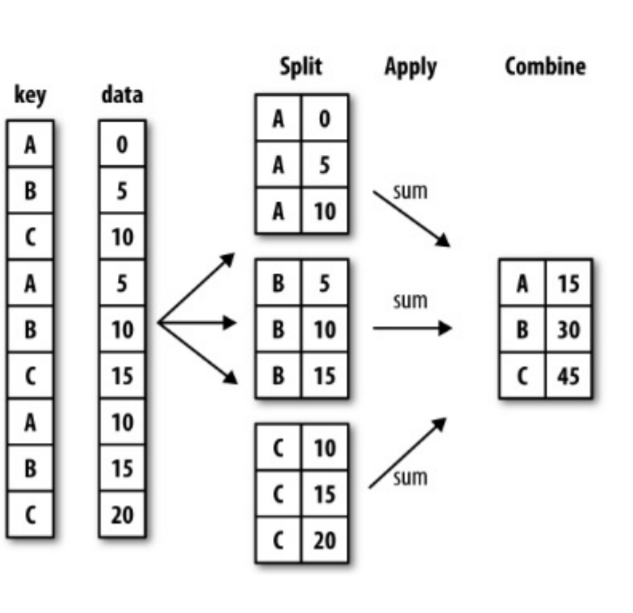
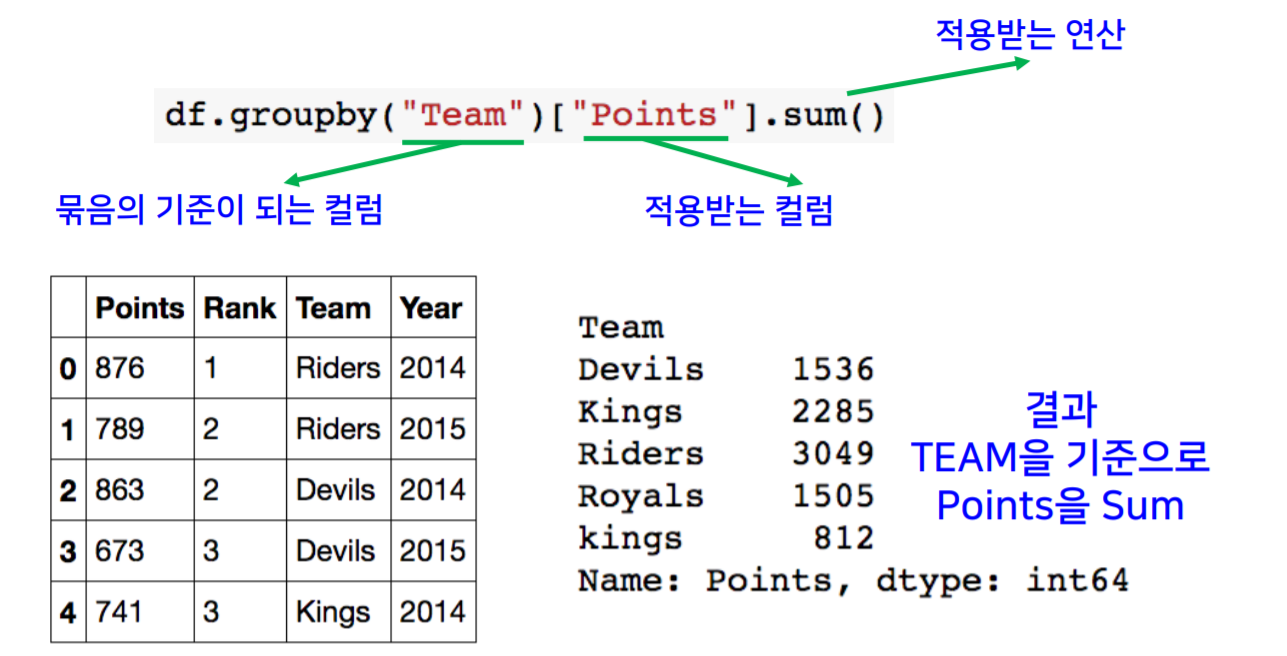

In [2]:
ipl_data = {
    "Team": [
        "Riders",
        "Riders",
        "Devils",
        "Devils",
        "Kings",
        "kings",
        "Kings",
        "Kings",
        "Riders",
        "Royals",
        "Royals",
        "Riders",
    ],
    "Rank": [1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2],
    "Year": [2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017],
    "Points": [876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690],
}

df = pd.DataFrame(ipl_data)

In [3]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [4]:
df.groupby("Team")["Points"].sum()

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

- 한 개 이상의 column을 묶을 수 있음

In [5]:
df.groupby("Team")["Points"].mean()

Team
Devils    768.000000
Kings     761.666667
Riders    762.250000
Royals    752.500000
kings     812.000000
Name: Points, dtype: float64

### Hierarchical index
- groupby 명령의 결과물도 결국은 dataframe
- 두 개의 column으로 groupby를 할 경우 index가 두 개 생성

In [6]:
h_index = df.groupby(["Team", "Year"])["Points"].sum()
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

In [7]:
h_index.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015),
            ( 'kings', 2015)],
           names=['Team', 'Year'])

In [8]:
h_index["Devils":"Kings"]

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Name: Points, dtype: int64

#### unstack( )
- group으로 묶여진 데이터를 matrix 형태로 전환해줌

In [9]:
h_index.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,NaN,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN
kings,NaN,812.0,NaN,NaN


In [10]:
h_index.unstack().stack()

Team    Year
Devils  2014    863.0
        2015    673.0
Kings   2014    741.0
        2016    756.0
        2017    788.0
Riders  2014    876.0
        2015    789.0
        2016    694.0
        2017    690.0
Royals  2014    701.0
        2015    804.0
kings   2015    812.0
dtype: float64

In [11]:
h_index.reset_index()

,Team,Year,Points
0,Devils,2014,863
1,Devils,2015,673
2,Kings,2014,741
3,Kings,2016,756
4,Kings,2017,788
5,Riders,2014,876
6,Riders,2015,789
7,Riders,2016,694
8,Riders,2017,690
9,Royals,2014,701


#### swaplevel( )
- index level을 변경할 수 있음

In [12]:
h_index.swaplevel()

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
      kings     812
Name: Points, dtype: int64

In [13]:
h_index.sort_index(level=0)

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

In [14]:
h_index.sort_index(level=1)

Team    Year
Devils  2014    863
Kings   2014    741
Riders  2014    876
Royals  2014    701
Devils  2015    673
Riders  2015    789
Royals  2015    804
kings   2015    812
Kings   2016    756
Riders  2016    694
Kings   2017    788
Riders  2017    690
Name: Points, dtype: int64

In [15]:
h_index.sort_values()

Team    Year
Devils  2015    673
Riders  2017    690
        2016    694
Royals  2014    701
Kings   2014    741
        2016    756
        2017    788
Riders  2015    789
Royals  2015    804
kings   2015    812
Devils  2014    863
Riders  2014    876
Name: Points, dtype: int64

In [16]:
type(h_index) # Series

pandas.core.series.Series

#### operations
- index level을 기준으로 기본 연산 수행 가능

In [17]:
h_index.sum(level=0)

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

In [18]:
h_index.std(level=1)

Year
2014    87.439026
2015    65.035888
2016    43.840620
2017    69.296465
Name: Points, dtype: float64

#### grouped
- groupby에 의해 split된 상태를 추출 가능함

In [19]:
grouped = df.groupby("Team")

In [20]:
# tuple 형태로 그룹의 key 값, value 값이 추출됨
for name, group in grouped:
    print(name)
    print(group)

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804
kings
    Team  Rank  Year  Points
5  kings     4  2015     812


- 특정 key 값을 가진 그룹의 정보만 추출 가능

In [21]:
grouped.get_group("Devils")

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673


- 추출된 group 정보에는 세 가지 유형의 apply가 가능함
- Aggregation: 요약된 통계 정보를 추출해줌
- Transformation: 해당 정보를 변환해줌
- Filtration: 특정 정보를 제거하여 보여주는 필터링 기능

#### Aggregation

In [22]:
grouped.agg(max)

,Rank,Year,Points
Team,,,
Devils,3,2015,863
Kings,3,2017,788
Riders,2,2017,876
Royals,4,2015,804
kings,4,2015,812


In [23]:
import numpy as np
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


In [24]:
# 특정 column에 여러 개의 function을 apply할 수도 있음
grouped["Points"].agg([np.sum, np.mean, np.std])

,sum,mean,std
Team,,,
Devils,1536,768.000000,134.350288
Kings,2285,761.666667,24.006943
Riders,3049,762.250000,88.567771
Royals,1505,752.500000,72.831998
kings,812,812.000000,NaN


In [25]:
df.describe()

,Rank,Year,Points
count,12.000000,12.000000,12.000000
mean,2.166667,2015.166667,765.583333
std,1.114641,1.114641,67.849376
min,1.000000,2014.000000,673.000000
25%,1.000000,2014.000000,699.250000
50%,2.000000,2015.000000,772.000000
75%,3.000000,2016.000000,806.000000
max,4.000000,2017.000000,876.000000


In [26]:
grouped.describe().T

Team               Devils        Kings       Riders       Royals   kings
Rank   count     2.000000     3.000000     4.000000     2.000000     1.0
       mean      2.500000     1.666667     1.750000     2.500000     4.0
       std       0.707107     1.154701     0.500000     2.121320     NaN
       min       2.000000     1.000000     1.000000     1.000000     4.0
       25%       2.250000     1.000000     1.750000     1.750000     4.0
       50%       2.500000     1.000000     2.000000     2.500000     4.0
       75%       2.750000     2.000000     2.000000     3.250000     4.0
       max       3.000000     3.000000     2.000000     4.000000     4.0
Year   count     2.000000     3.000000     4.000000     2.000000     1.0
       mean   2014.500000  2015.666667  2015.500000  2014.500000  2015.0
       std       0.707107     1.527525     1.290994     0.707107     NaN
       min    2014.000000  2014.000000  2014.000000  2014.000000  2015.0
       25%    2014.250000  2015.000000  2014.750000  2014.250000  2015.0
       50%    2014.500000  2016.000000  2015.500000  2014.500000  2015.0
       75%    2014.750000  2016.500000  2016.250000  2014.750000  2015.0
       max    2015.000000  2017.000000  2017.000000  2015.000000  2015.0
Points count     2.000000     3.000000     4.000000     2.000000     1.0
       mean    768.000000   761.666667   762.250000   752.500000   812.0
       std     134.350288    24.006943    88.567771    72.831998     NaN
       min     673.000000   741.000000   690.000000   701.000000   812.0
       25%     720.500000   748.500000   693.000000   726.750000   812.0
       50%     768.000000   756.000000   741.500000   752.500000   812.0
       75%     815.500000   772.000000   810.750000   778.250000   812.0
       max     863.000000   788.000000   876.000000   804.000000   812.0

#### Transformation
- Aggregation과 달리 key 값 별로 요약된 정보가 아님
- 개별 데이터의 변환을 지원함

In [27]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [28]:
score = lambda x: (x)
grouped.transform(score)

,Rank,Year,Points
0,1,2014,876
1,2,2015,789
2,2,2014,863
3,3,2015,673
4,3,2014,741
5,4,2015,812
6,1,2016,756
7,1,2017,788
8,2,2016,694
9,4,2014,701


- 단, max나 min처럼 series 데이터에 적용되는 데이터들은 key 값을 기준으로 grouped된 데이터 기준

In [29]:
score = lambda x: (x.max())
grouped.transform(score)

,Rank,Year,Points
0,2,2017,876
1,2,2017,876
2,3,2015,863
3,3,2015,863
4,3,2017,788
5,4,2015,812
6,3,2017,788
7,3,2017,788
8,2,2017,876
9,4,2015,804


$$z_{i}=\frac{x_{i}-\mu}{\sigma}$$

In [30]:
score = lambda x: (x - x.mean()) / x.std()
grouped.transform(score)

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,1.154701,-1.091089,-0.860862
5,NaN,NaN,NaN
6,-0.577350,0.218218,-0.236043
7,-0.577350,0.872872,1.096905
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


In [31]:
score = lambda x: (x - x.min()) / (x.max() - x.min())
grouped.transform(score)

,Rank,Year,Points
0,0.0,0.000000,1.000000
1,1.0,0.333333,0.532258
2,0.0,0.000000,1.000000
3,1.0,1.000000,0.000000
4,1.0,0.000000,0.000000
5,NaN,NaN,NaN
6,0.0,0.666667,0.319149
7,0.0,1.000000,1.000000
8,1.0,0.666667,0.021505
9,1.0,0.000000,0.000000


#### Filter
- 특정 조건으로 데이터를 검색할 때 사용

In [32]:
df["Team"].value_counts()

Riders    4
Kings     3
Devils    2
Royals    2
kings     1
Name: Team, dtype: int64

- filter 안에는 boolean 조건이 존재해야함
- len(x)는 grouped된 dataframe 개수

In [33]:
df.groupby("Team").filter(lambda x: len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [34]:
df.groupby("Team").filter(lambda x: x["Points"].mean() > 750)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [35]:
df.groupby("Team").filter(lambda x: x["Points"].max() > 800)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
5,kings,4,2015,812
8,Riders,2,2016,694
9,Royals,4,2014,701
10,Royals,1,2015,804
11,Riders,2,2017,690


In [36]:
df.groupby("Team").filter(lambda x: x["Rank"].sum() > 2)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [37]:
df.groupby("Team").filter(lambda x: x["Rank"].mean() > 1)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


### Case study

#### Data
- 시간과 데이터 종류가 정리된 통화량 데이터

In [38]:
df_phone = pd.read_csv("./data/phone_data.csv")
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [39]:
df_phone.dtypes

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [40]:
import dateutil

df_phone["date"] = df_phone["date"].apply(dateutil.parser.parse, dayfirst=True)
df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [41]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [42]:
df_phone.groupby("month")["duration"].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

<AxesSubplot:xlabel='month'>

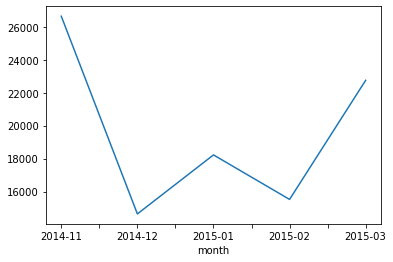

In [43]:
df_phone.groupby("month")["duration"].sum().plot()

In [44]:
df_phone[df_phone["item"] == "call"].groupby("month")["duration"].sum()

month
2014-11    25547.0
2014-12    13561.0
2015-01    17070.0
2015-02    14416.0
2015-03    21727.0
Name: duration, dtype: float64

<AxesSubplot:xlabel='month'>

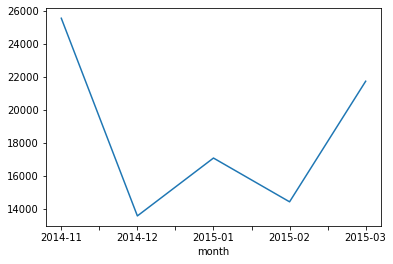

In [45]:
df_phone[df_phone["item"] == "call"].groupby("month")["duration"].sum().plot()

In [46]:
df_phone[df_phone["item"] == "data"].groupby("month")["duration"].sum()

month
2014-11     998.441
2014-12    1032.870
2015-01    1067.299
2015-02    1067.299
2015-03     998.441
Name: duration, dtype: float64

<AxesSubplot:xlabel='month'>

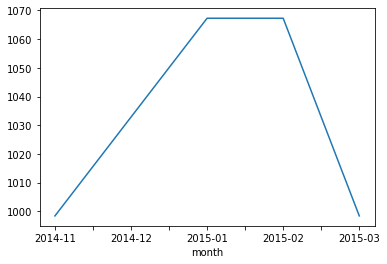

In [47]:
df_phone[df_phone["item"] == "data"].groupby("month")["duration"].sum().plot()

In [48]:
df_phone[df_phone["item"] == "sms"].groupby("month")["duration"].sum()

month
2014-11    94.0
2014-12    48.0
2015-01    86.0
2015-02    39.0
2015-03    25.0
Name: duration, dtype: float64

<AxesSubplot:xlabel='month'>

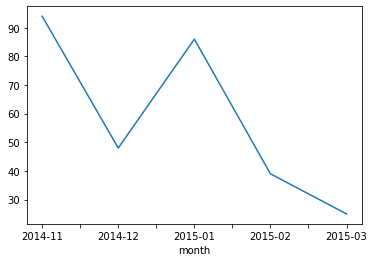

In [49]:
df_phone[df_phone["item"] == "sms"].groupby("month")["duration"].sum().plot()

In [50]:
df_phone.groupby(["month", "item"])["duration"].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


<AxesSubplot:xlabel='month'>

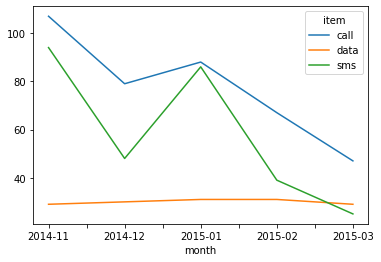

In [51]:
df_phone.groupby(["month", "item"])["duration"].count().unstack().plot()

In [52]:
df_phone.groupby("month", as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [53]:
df_phone.groupby("month").agg({"duration": "sum"}).reset_index()

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [54]:
df_phone.groupby(["month", "item"]).agg({
    "duration": "sum",
    "network_type": "count",
    "date": "first",})

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [55]:
grouped = df_phone.groupby("month").agg({"duration": [min, max, np.mean]})
grouped

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

In [56]:
grouped.rename(columns={"min": "min_duration", "max": "max_duration", "mean": "mean_duration"})

duration                           
        min_duration max_duration mean_duration
month                                          
2014-11          1.0       1940.0    115.823657
2014-12          1.0       2120.0     93.260318
2015-01          1.0       1859.0     88.894141
2015-02          1.0       1863.0    113.301453
2015-03          1.0      10528.0    225.251891

### pivot table
- index 축은 groupby와 동일함
- column에 추가로 labeling 값을 추가하여 value에 numeric type 값을 aggregation하는 형태

In [57]:
df_phone = pd.read_csv("./data/phone_data.csv")
df_phone["date"] = df_phone["date"].apply(dateutil.parser.parse, dayfirst=True)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [58]:
df_phone.pivot_table(
    values=["duration"],
    index=[df_phone.month, df_phone.item],
    columns=df_phone.network,
    aggfunc="sum",
    fill_value=0,
)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

In [59]:
df_phone.groupby(["month", "item", "network"])["duration"].sum().unstack()

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0

### crosstab
- 두 column의 교차 빈도, 비율, 덧셈 등을 구할 때 사용
- pivot table의 특수한 형태
- User-Item Ranking Matrix 등을 만들 때 사용 가능함

In [60]:
df_movie = pd.read_csv("./data/movie_rating.csv")
df_movie.head()

,critic,title,rating
0,Jack Matthews,Lady in the Water,3.0
1,Jack Matthews,Snakes on a Plane,4.0
2,Jack Matthews,You Me and Dupree,3.5
3,Jack Matthews,Superman Returns,5.0
4,Jack Matthews,The Night Listener,3.0


In [61]:
df_movie.pivot_table(
    ["rating"],
    index=df_movie.critic,
    columns=df_movie.title,
    aggfunc="sum",
    fill_value=0,
)

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               0.0               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          0.0               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   0.0               0.0               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                0.0               1.0

In [62]:
pd.crosstab(
    index=df_movie.critic,
    columns=df_movie.title,
    values=df_movie.rating,
    aggfunc="first",
).fillna(0)

title,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,You Me and Dupree
critic,,,,,,
Claudia Puig,3.0,0.0,3.5,4.0,4.5,2.5
Gene Seymour,1.5,3.0,3.5,5.0,3.0,3.5
Jack Matthews,0.0,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,2.0
Toby,0.0,0.0,4.5,4.0,0.0,1.0


In [63]:
df_movie.groupby(["critic", "title"]).agg({"rating": "first"})

rating
critic        title                     
Claudia Puig  Just My Luck           3.0
              Snakes on a Plane      3.5
              Superman Returns       4.0
              The Night Listener     4.5
              You Me and Dupree      2.5
Gene Seymour  Just My Luck           1.5
              Lady in the Water      3.0
              Snakes on a Plane      3.5
              Superman Returns       5.0
              The Night Listener     3.0
              You Me and Dupree      3.5
Jack Matthews Lady in the Water      3.0
              Snakes on a Plane      4.0
              Superman Returns       5.0
              The Night Listener     3.0
              You Me and Dupree      3.5
Lisa Rose     Just My Luck           3.0
              Lady in the Water      2.5
              Snakes on a Plane      3.5
              Superman Returns       3.5
              The Night Listener     3.0
              You Me and Dupree      2.5
Mick LaSalle  Just My Luck           2.0
              Lady in the Water      3.0
              Snakes on a Plane      4.0
              Superman Returns       3.0
              The Night Listener     3.0
              You Me and Dupree      2.0
Toby          Snakes on a Plane      4.5
              Superman Returns       4.0
              You Me and Dupree      1.0

In [64]:
df_movie.groupby(["critic", "title"]).agg({"rating": "first"}).unstack()

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               NaN               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          NaN               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   NaN               NaN               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                NaN               1.0

### merge
- SQL에서의 merge와 같은 기능
- 두 개의 데이터를 하나로 합침

In [65]:
raw_data = {
    "subject_id": ["1", "2", "3", "4", "5", "7", "8", "9", "10", "11"],
    "test_score": [51, 15, 15, 61, 16, 14, 15, 1, 61, 16],
}
df_a = pd.DataFrame(raw_data, columns=["subject_id", "test_score"])
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [66]:
raw_data = {
    "subject_id": ["4", "5", "6", "7", "8"],
    "first_name": ["Billy", "Brian", "Bran", "Bryce", "Betty"],
    "last_name": ["Bonder", "Black", "Balwner", "Brice", "Btisan"],
}
df_b = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [67]:
pd.merge(df_a, df_b, on="subject_id") # subject_id 기준으로 merge

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [68]:
pd.merge(df_a, df_b, left_on="subject_id", right_on="subject_id") # 두 dataframe에서 column 이름이 다를때

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


- join method

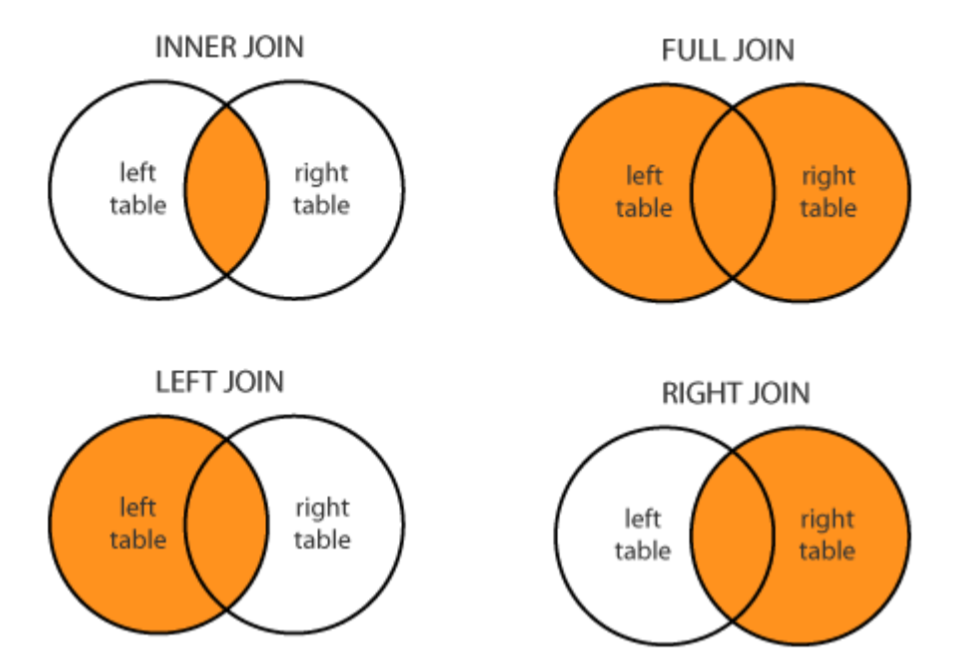

In [69]:
pd.merge(df_a, df_b, on="subject_id", how="left") # left join

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


In [70]:
pd.merge(df_a, df_b, on="subject_id", how="right") # right join

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


In [71]:
pd.merge(df_a, df_b, on="subject_id", how="inner") # inner join

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [72]:
pd.merge(df_a, df_b, on="subject_id", how="outer") # outer(full) join

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


In [73]:
pd.merge(df_a, df_b, right_index=True, left_index=True) # index based join

,subject_id_x,test_score,subject_id_y,first_name,last_name
0,1,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Btisan


### concat
- 같은 형태의 데이터를 붙이는 연산작업

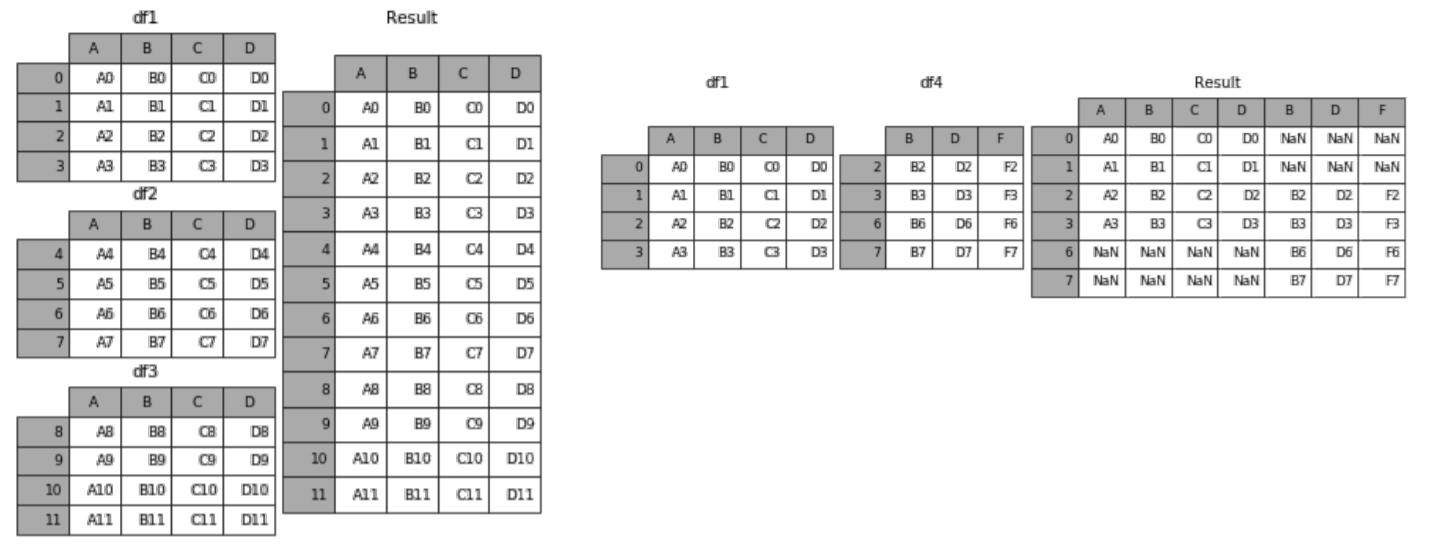

In [74]:
raw_data = {
    "subject_id": ["1", "2", "3", "4", "5"],
    "first_name": ["Alex", "Amy", "Allen", "Alice", "Ayoung"],
    "last_name": ["Anderson", "Ackerman", "Ali", "Aoni", "Atiches"],
}
df_a = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [75]:
raw_data = {
    "subject_id": ["4", "5", "6", "7", "8"],
    "first_name": ["Billy", "Brian", "Bran", "Bryce", "Betty"],
    "last_name": ["Bonder", "Black", "Balwner", "Brice", "Btisan"],
}
df_b = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [76]:
df_new = pd.concat([df_a, df_b])
df_new.reset_index(drop=True)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [77]:
df_a.append(df_b)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [78]:
df_new = pd.concat([df_a, df_b], axis=1)
df_new.reset_index(drop=True)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [79]:
import os

In [80]:
files = [file_name for file_name in os.listdir("./data") if file_name.endswith("xlsx")]
files

['customer-status.xlsx',
 'excel-comp-data.xlsx',
 'sales-feb-2014.xlsx',
 'sales-jan-2014.xlsx',
 'sales-mar-2014.xlsx']

In [81]:
files.remove("excel-comp-data.xlsx")
files

['customer-status.xlsx',
 'sales-feb-2014.xlsx',
 'sales-jan-2014.xlsx',
 'sales-mar-2014.xlsx']

In [82]:
df_list = [pd.read_excel(os.path.join("./data", df_filename)) for df_filename in files]
status = df_list[0]
sales = pd.concat(df_list[1:])

In [83]:
status.head()

,account number,name,status
0,740150,Barton LLC,gold
1,714466,Trantow-Barrows,silver
2,218895,Kulas Inc,bronze
3,307599,"Kassulke, Ondricka and Metz",bronze
4,412290,Jerde-Hilpert,bronze


In [84]:
sales.head()

,account number,name,sku,quantity,unit price,ext price,date
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20


In [85]:
merge_df = pd.merge(status, sales, how="left", on="account number")
merge_df.head()

,account number,name_x,status,name_y,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,gold,Barton LLC,S1-93683,21,10.34,217.14,2014-02-07 08:34:50
1,740150,Barton LLC,gold,Barton LLC,S2-10342,47,96.68,4543.96,2014-02-12 03:36:52
2,740150,Barton LLC,gold,Barton LLC,B1-38851,3,79.49,238.47,2014-02-12 05:09:16
3,740150,Barton LLC,gold,Barton LLC,B1-20000,28,81.39,2278.92,2014-02-15 07:45:16
4,740150,Barton LLC,gold,Barton LLC,B1-38851,17,81.22,1380.74,2014-02-17 17:12:16


In [86]:
del merge_df["name_x"]

In [87]:
merge_df.groupby(["status", "name_y"])["quantity", "ext price"].sum().reset_index().sort_values(by=["status", "quantity"], ascending=False)

<ipython-input-87-8e6c8ff4b5ec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merge_df.groupby(["status", "name_y"])["quantity", "ext price"].sum().reset_index().sort_values(by=["status", "quantity"], ascending=False)


,status,name_y,quantity,ext price
14,silver,Trantow-Barrows,643,35354.61
13,silver,Kuhn-Gusikowski,558,29994.43
15,silver,White-Trantow,556,34070.80
10,silver,Keeling LLC,438,27341.41
11,silver,Kiehn-Spinka,350,21027.06
9,silver,"Frami, Hills and Schmidt",338,19634.31
12,silver,Koepp Ltd,315,17381.89
6,gold,"Cronin, Oberbrunner and Spencer",543,26809.63
8,gold,Stokes LLC,449,25680.43
7,gold,Herman LLC,417,22940.82


### persistence

#### Database connection
- Data loading 시 db connection 기능을 제공함

In [88]:
import sqlite3

In [89]:
conn = sqlite3.connect("./data/flights.db") # database 연결 코드
cur = conn.cursor()
cur.execute("select * from airlines limit 5;")
results = cur.fetchall()
results

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y'),
 (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N'),
 (2, '3', '1Time Airline', '\\N', '1T', 'RNX', 'NEXTIME', 'South Africa', 'Y'),
 (3,
  '4',
  '2 Sqn No 1 Elementary Flying Training School',
  '\\N',
  None,
  'WYT',
  None,
  'United Kingdom',
  'N'),
 (4, '5', '213 Flight Unit', '\\N', None, 'TFU', None, 'Russia', 'N')]

In [90]:
df_airlines = pd.read_sql_query("select * from airlines;", conn) # db 연결 connection을 사용하여 dataframe 생성
df_airlines

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N
...,...,...,...,...,...,...,...,...,...
6043,6043,19828,Vuela Cuba,Vuela Cuba,6C,6CC,None,Cuba,Y
6044,6044,19830,All Australia,All Australia,88,8K8,None,Australia,Y
6045,6045,19831,Fly Europa,None,ER,RWW,None,Spain,Y
6046,6046,19834,FlyPortugal,None,PO,FPT,FlyPortugal,Portugal,Y


In [91]:
df_airports = pd.read_sql_query("select * from airports;", conn)
df_airports

,index,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
1,1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.7887,20,10,U,Pacific/Port_Moresby
2,2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10,U,Pacific/Port_Moresby
3,3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10,U,Pacific/Port_Moresby
4,4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.22005,146,10,U,Pacific/Port_Moresby
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,8102,9537,Mansons Landing Water Aerodrome,Mansons Landing,Canada,YMU,\N,50.066667,-124.983333,0,-8,A,America/Vancouver
8103,8103,9538,Port McNeill Airport,Port McNeill,Canada,YMP,\N,50.575556,-127.028611,225,-8,A,America/Vancouver
8104,8104,9539,Sullivan Bay Water Aerodrome,Sullivan Bay,Canada,YTG,\N,50.883333,-126.833333,0,-8,A,America/Vancouver
8105,8105,9540,Deer Harbor Seaplane,Deer Harbor,United States,DHB,\N,48.618397,-123.00596,0,-8,A,America/Los_Angeles


In [92]:
df_routes = pd.read_sql_query("select * from routes;", conn)
df_routes

,index,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,0,2B,410,AER,2965,KZN,2990,None,0,CR2
1,1,2B,410,ASF,2966,KZN,2990,None,0,CR2
2,2,2B,410,ASF,2966,MRV,2962,None,0,CR2
3,3,2B,410,CEK,2968,KZN,2990,None,0,CR2
4,4,2B,410,CEK,2968,OVB,4078,None,0,CR2
...,...,...,...,...,...,...,...,...,...,...
67658,67658,ZL,4178,WYA,6334,ADL,3341,None,0,SF3
67659,67659,ZM,19016,DME,4029,FRU,2912,None,0,734
67660,67660,ZM,19016,FRU,2912,DME,4029,None,0,734
67661,67661,ZM,19016,FRU,2912,OSS,2913,None,0,734


#### XLS persistence
- dataframe의 엑셀 추출 코드
- Xls 엔진으로 openpyxls 또는 XlsxWrite 사용

In [93]:
writer = pd.ExcelWriter('./data/df_routes.xlsx', engine='xlsxwriter')
df_routes.to_excel(writer, sheet_name='Sheet1')

#### Pickle persistence
- 가장 일반적인 python 파일 persistence
- to_pickle, read_pickle 함수 사용

In [94]:
df_routes.to_pickle("./data/df_routes.pickle")

In [95]:
df_routes_pickle = pd.read_pickle("./data/df_routes.pickle")
df_routes_pickle.head()

,index,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,0,2B,410,AER,2965,KZN,2990,None,0,CR2
1,1,2B,410,ASF,2966,KZN,2990,None,0,CR2
2,2,2B,410,ASF,2966,MRV,2962,None,0,CR2
3,3,2B,410,CEK,2968,KZN,2990,None,0,CR2
4,4,2B,410,CEK,2968,OVB,4078,None,0,CR2


In [96]:
df_routes_pickle.describe()

,index
count,67663.000000
mean,33831.000000
std,19532.769969
min,0.000000
25%,16915.500000
50%,33831.000000
75%,50746.500000
max,67662.000000


> **[AI Math]** 확률론 맛보기

### 딥러닝에서 확률론이 왜 필요할까?
- 딥러닝은 <span style="color:orange">확률론 기반의 기계학습 이론</span>에 바탕을 두고 있다
- 기계학습에서 사용되는 손실함수(loss function)들의 작동 원리는 데이터 공간을 통계적으로 해석해서 유도하게 된다
    - 예측이 틀릴 위험(risk)을 최소화하도록 데이터를 학습하는 원리는 통계적 기계학습의 기본 원리이다
- 회귀 분석에서 손실함수로 사용되는 $L_2$-노름은 <span style="color:orange">예측오차의 분산을 가장 최소화하는 방향으로 학습</span>하도록 유도한다
- 분류 문제에서 사용되는 교차엔트로피(cross-entropy)는 <span style="color:orange">모델 예측의 불확실성을 최소화하는 방향으로 학습</span>하도록 유도한다
- 분산 및 불확실성을 <span style="color:orange">최소화하기 위해서 측정하는 방법</span>을 알아야 한다
    - 두 대상을 측정하는 방법을 통계학에서 제공하기 때문에 기계학습을 이해하려면 확률론의 기본 개념을 알아야 한다

### 확률분포는 데이터의 초상화
- 데이터공간을 $\mathscr X \times \mathscr Y$라 표기하고 $\mathscr D$는 데이터공간에서 데이터를 추출하는 분포라고 하자
    - 데이터가 정답 레이블을 항상 가진 지도학습을 상정한다
- 데이터는 확률변수로 $(\boldsymbol{\rm x}, y)\sim\mathscr D$라 표기
    - $(\boldsymbol{\rm x}, y)\in\mathscr X \times \mathscr Y$는 데이터공간 상의 <span style="color:orange">관측가능한 데이터</span>에 해당한다

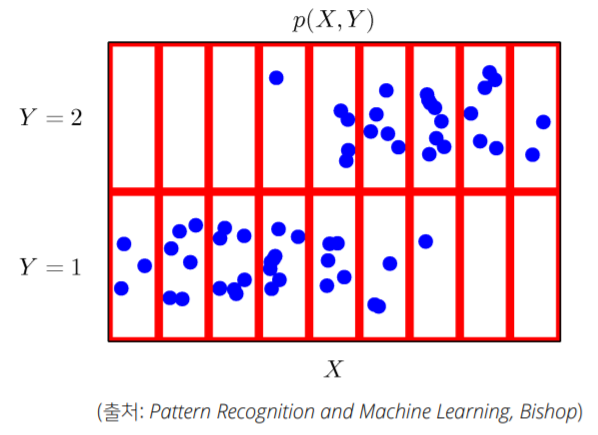

### 이산확률변수 vs 연속확률변수
- 확률변수는 확률분포 $\mathscr D$에 따라 <span style="color:red">이산형(discrete)</span>과 <span style="color:blue">연속형(continusous)</span> 확률변수로 구분하게 된다
    - 데이터공간 $\mathscr X \times \mathscr Y$에 의해 결정되는 것으로 오해를 하지만 $\mathscr D$에 의해 결정된다
- 이산형 확률변수는 <span style="color:red">확률변수가 가질 수 있는 경우의 수</span>를 모두 고려하여 <span style="color:red">확률을 더해서 모델링</span>한다
    - $P(X=\boldsymbol{\rm x})$는 확률변수가 $\boldsymbol{\rm x}$ 값을 가질 확률로 해석할 수 있다

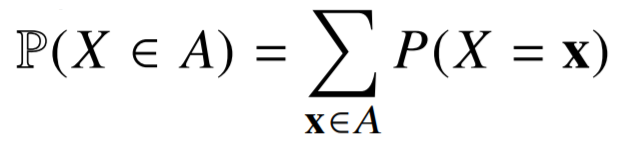

- 연속형 확률변수는 <span style="color:blue">데이터 공간에 정의된 확률변수의 밀도(density)</span> 위에서의 <span style="color:blue">적분을 통해 모델링</span>한다
    - 밀도는 누적확률분포의 변화율을 모델링하며 확률로 해석하면 안된다

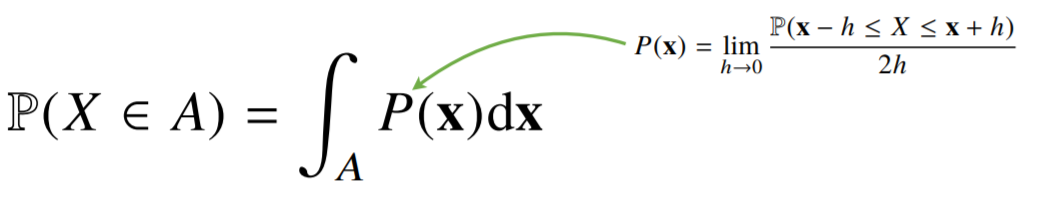

#### 결합분포
- 결합분포 $P(\boldsymbol{\rm x}, y)$는 $\mathscr D$를 모델링한다
    - $\mathscr D$는 이론적으로 존재하는 확률분포이기 때문에 사전에 알 수 없다

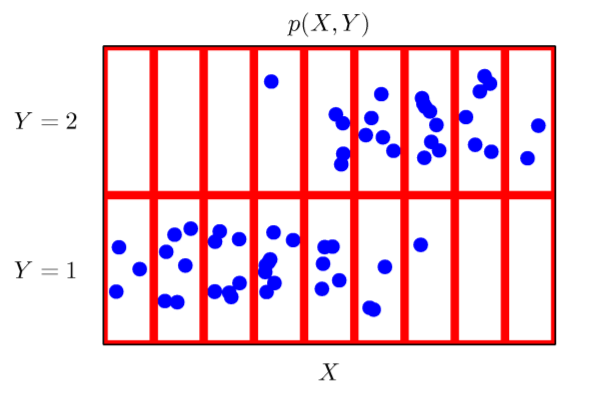

#### 주변확률분포
- $P(\boldsymbol{\rm x})$는 입력 $\boldsymbol{\rm x}$에 대한 주변확률분포로 $y$에 대한 정보를 주진 않는다
    - 주변확률분포 $P(\boldsymbol{\rm x})$는 결합확률분포 $P(\boldsymbol{\rm x},y)$에서 유도 가능하다
    
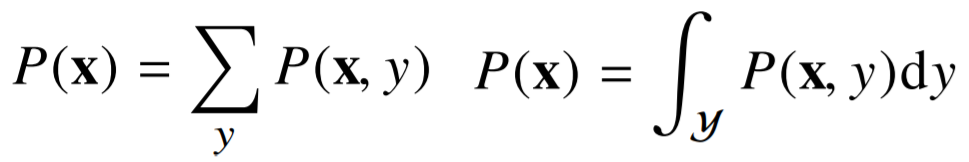
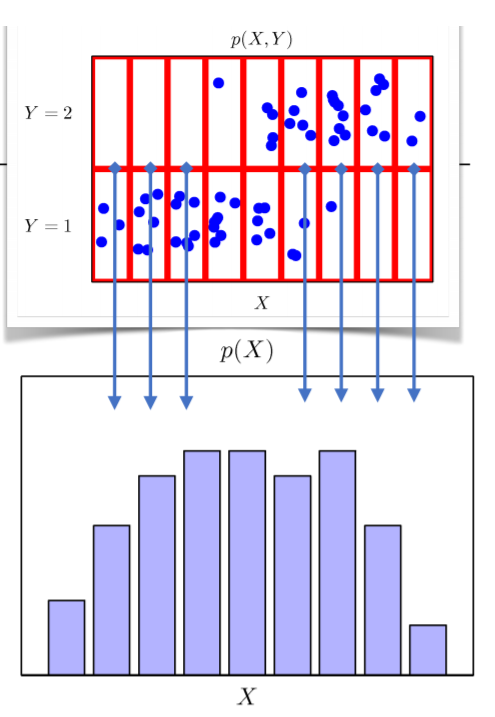

#### 조건부확률분포
- 조건부확률분포 $P(\boldsymbol{\rm x}|y)$는 데이터 공간에서 입력 $\boldsymbol{\rm x}$와 출력 $y$사이의 관계를 모델링한다
    - $P(\boldsymbol{\rm x}|y)$는 특정 클래스가 주어진 조건에서 데이터의 확률분포를 보여준다

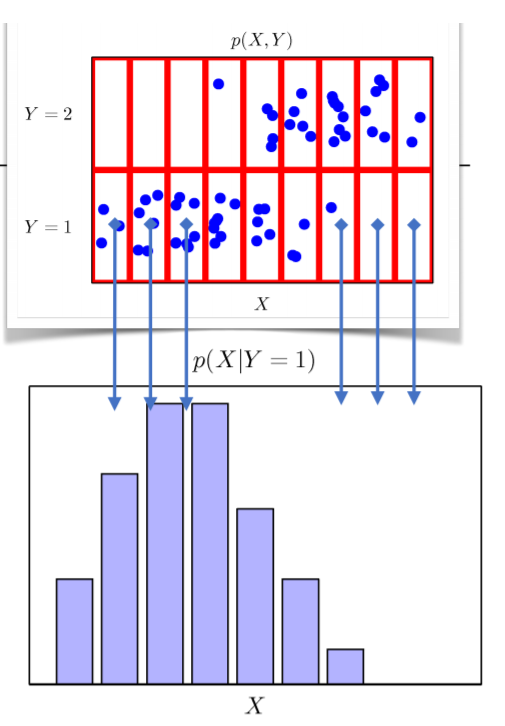

### 조건부확률과 기계학습
- 조건부확률 $P(y|\boldsymbol{\rm x})$는 입력변수 $\boldsymbol{\rm x}$에 대해 정답이 $y$일 확률을 의미한다
    - 연속확률분포의 경우 $P(y|\boldsymbol{\rm x})$는 확률이 아니고 밀도로 해석한다는 것을 주의!
- 로지스틱 회귀에서 사용했던 선형모델과 소프트맥스 함수의 결합은 <span style="color:orange">데이터에서 추출된 패턴을 기반으로 확률을 해석</span>하는데 사용된다
- 분류 문제에서 $\rm{softmax}(\boldsymbol{\rm W}\phi+\boldsymbol{\rm b})
$은 데이터 $\boldsymbol{\rm x}$로부터 추출된 특징패턴 $\phi(\boldsymbol{\rm x})$과 가중치행렬 $\boldsymbol{\rm W}$을 통해 조건부확률 $P(y|\boldsymbol{\rm x})$을 계산한다
    - $P(y|\phi(\boldsymbol{\rm x}))$이라 써도 된다
- 회귀 문제의 경우 조건부기대값 $\mathbb E\left[y|\boldsymbol{\rm x}\right]$을 추정한다
    - 조건부기대값은 $\mathbb E$$\parallel$$y-f(\boldsymbol{\rm x}) \parallel_2$을 최소화하는 함수 $f(\boldsymbol{\rm x})$와 일치한다

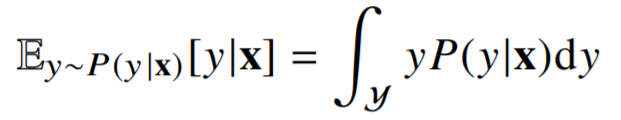

- 딥러닝은 다층신경망을 사용하여 데이터로부터 특징패턴 $\phi$을 추출한다
    - 특징패턴을 학습하기 위해 어떤 손실함수를 사용할지는 기계학습 문제와 모델에 의해 결정된다

### 기대값
- 확률분포가 주어지면 데이터를 분석하는 데 사용 가능한 여러 종류의 <span style="color:orange">통계적 범함수(statistical functional)를 계산</span>할 수 있다
- <span style="color:orange">기대값(expectation)은 데이터를 대표하는 통계량</span>이면서 동시에 확률분포를 통해 다른 통계적 범함수를 계산하는데 사용된다

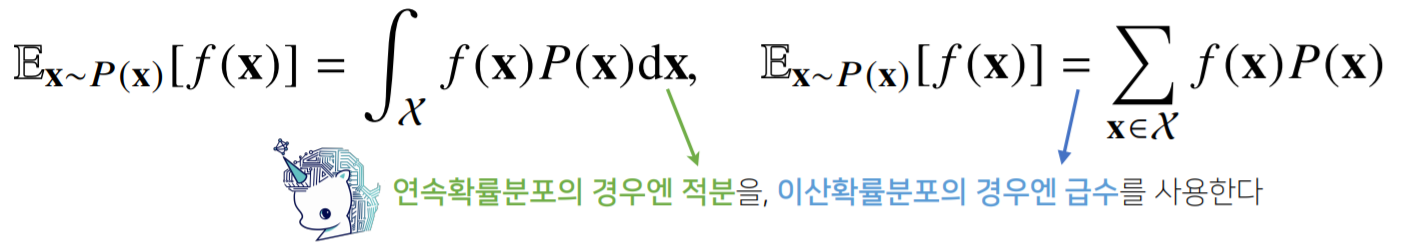

- 기대값을 이용해 분산, 왜도, 첨도, 공분산 등 여러 통계량을 계산할 수 있다
    - 위 수식에 $f$대신 대입하면 통계량을 계산할 수 있다

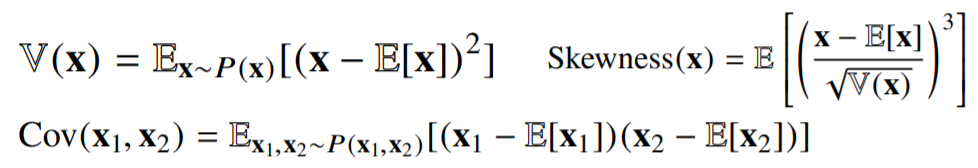

### 몬테카를로 샘플링
- 기계학습의 많은 문제들은 확률분포를 명시적으로 모를 때가 대부분이다
- 확률분포를 모를 때 <span style="color:orange">데이터를 이용하여 기대값을 계산하려면 몬테카를로(Monte Carlo) 샘플링 방법을 사용</span>해야 한다
    - 몬테카를로는 이산형이든 연속형이든 상관없이 성립한다

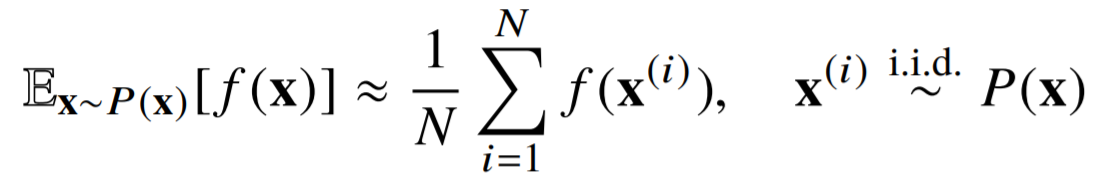

- 몬테카를로 샘플링은 독립추출만 보장된다면 <span style="color:orange">대수의 법칙(law of large number)에 의해 수렴성을 보장</span>한다
    - 몬테카를로 샘플링은 기계학습에서 매우 다양하게 응용되는 방법이다

#### 몬테카를로 예제: 적분 계산하기
- 함수 $f(x)=e^{-x^{2}}$의 $\left[ -1,1\right]$ 상에서 적분값을 어떻게 구할까?
    - $f(x)$의 적분을 해석적으로 구하는 건 불가능하다

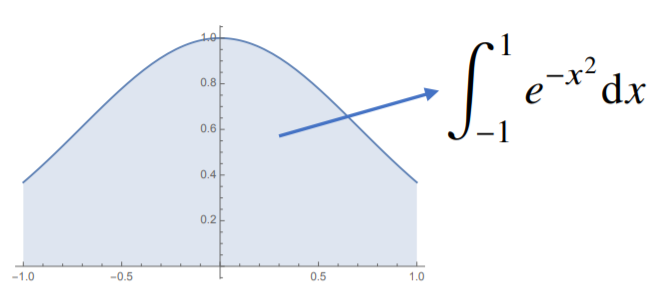

- 구간 $\left[ -1,1\right]$의 길이는 2이므로 적분값을 2로 나누면 기대값을 계산하는 것과 같으므로 몬테카를로 방법을 사용할 수 있다

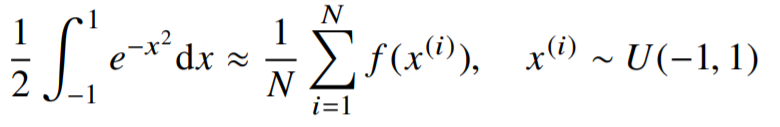

In [97]:
import numpy as np

def mc_int(fun, low, high, sample_size=100, repeat=10):
    int_len = np.abs(high - low)
    stat = []
    for _ in range(repeat):
        x = np.random.uniform(low=low, high=high, size=sample_size)
        fun_x = fun(x)
        int_val = int_len * np.mean(fun_x)
        stat.append(int_val)
    return np.mean(stat), np.std(stat)

def f_x(x):
    return np.exp(-x**2)

print(mc_int(f_x, low=-1, high=1, sample_size=10000, repeat=100))

(1.4933912241892986, 0.0036428420711490423)


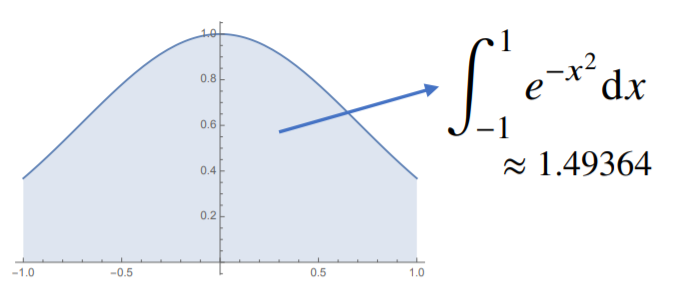

- $1.49339\pm0.00364$이므로 오차 범위 안에 참값이 있다